In [68]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ydata_profiling

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/numba/core/decorators.py:262: NumbaDeprecationWarning: numba.generated_jit is deprecated. Please see the documentation at: https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-generated-jit for more information and advice on a suitable replacement.
  warnings.warn(msg, NumbaDeprecationWarning)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/visions/backends/shared/nan_handling.py:51: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def hasna(x: np.ndarray) -> bool:


In [69]:
data = pd.read_csv('../Data/bengaluru_house_prices.csv')

In [70]:
data.shape

(13320, 9)

In [71]:
data.describe()

bath       balcony         price
count  13247.000000  12711.000000  13320.000000
mean       2.692610      1.584376    112.565627
std        1.341458      0.817263    148.971674
min        1.000000      0.000000      8.000000
25%        2.000000      1.000000     50.000000
50%        2.000000      2.000000     72.000000
75%        3.000000      2.000000    120.000000
max       40.000000      3.000000   3600.000000

### Exploratory Data Analysis

In [72]:
data.groupby('area_type')['area_type'].agg('count')

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In [73]:
data_2 = data.drop(['area_type', 'society', 'balcony', 'availability'], axis='columns')
data_2.head()

location       size total_sqft  bath   price
0  Electronic City Phase II      2 BHK       1056   2.0   39.07
1          Chikka Tirupathi  4 Bedroom       2600   5.0  120.00
2               Uttarahalli      3 BHK       1440   2.0   62.00
3        Lingadheeranahalli      3 BHK       1521   3.0   95.00
4                  Kothanur      2 BHK       1200   2.0   51.00

Data Cleaning

In [74]:
data_2.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [75]:
data_2.describe()

bath         price
count  13247.000000  13320.000000
mean       2.692610    112.565627
std        1.341458    148.971674
min        1.000000      8.000000
25%        2.000000     50.000000
50%        2.000000     72.000000
75%        3.000000    120.000000
max       40.000000   3600.000000

In [76]:
data_3 = data_2.dropna()
data_3.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [77]:
data_3.shape

(13246, 5)

In [78]:
data_3['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [79]:
# Creating a column that shows the number of bedrooms in the
data_3['bedrooms'] = data_3['size'].apply(lambda x: int(x.split(' ')[0]))

/var/folders/h5/x30m0dg90wlfdhdlz31t7jwr0000gn/T/ipykernel_62040/3624290020.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_3['bedrooms'] = data_3['size'].apply(lambda x: int(x.split(' ')[0]))


In [80]:
data_3.head()

location       size total_sqft  bath   price  bedrooms
0  Electronic City Phase II      2 BHK       1056   2.0   39.07         2
1          Chikka Tirupathi  4 Bedroom       2600   5.0  120.00         4
2               Uttarahalli      3 BHK       1440   2.0   62.00         3
3        Lingadheeranahalli      3 BHK       1521   3.0   95.00         3
4                  Kothanur      2 BHK       1200   2.0   51.00         2

In [81]:
data_3['bedrooms'].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18])

In [82]:
data_3[data_3.bedrooms>20]

location        size total_sqft  bath  price  bedrooms
1718  2Electronic City Phase II      27 BHK       8000  27.0  230.0        27
4684                Munnekollal  43 Bedroom       2400  40.0  660.0        43

In [83]:
data_3.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [84]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [85]:
data_3[~data_3['total_sqft'].apply(is_float)].head(10)

location       size      total_sqft  bath    price  bedrooms
30            Yelahanka      4 BHK     2100 - 2850   4.0  186.000         4
122              Hebbal      4 BHK     3067 - 8156   4.0  477.000         4
137  8th Phase JP Nagar      2 BHK     1042 - 1105   2.0   54.005         2
165            Sarjapur      2 BHK     1145 - 1340   2.0   43.490         2
188            KR Puram      2 BHK     1015 - 1540   2.0   56.800         2
410             Kengeri      1 BHK  34.46Sq. Meter   1.0   18.500         1
549         Hennur Road      2 BHK     1195 - 1440   2.0   63.770         2
648             Arekere  9 Bedroom       4125Perch   9.0  265.000         9
661           Yelahanka      2 BHK     1120 - 1145   2.0   48.130         2
672        Bettahalsoor  4 Bedroom     3090 - 5002   4.0  445.000         4

In [86]:
def convert_sqft_to_num(x):
    tokens = x.split(('-'))
    if len(tokens) == 2:
        return (float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None

In [87]:
convert_sqft_to_num('2166')

2166.0

In [88]:
convert_sqft_to_num('2100 - 2850')

2475.0

In [89]:
convert_sqft_to_num('34.46Sq. Meter')

In [90]:
data_4 = data_3.copy()

In [91]:
data_4['total_sqft'] = data_4['total_sqft'].apply(convert_sqft_to_num)
data_4.head()

location       size  total_sqft  bath   price  bedrooms
0  Electronic City Phase II      2 BHK      1056.0   2.0   39.07         2
1          Chikka Tirupathi  4 Bedroom      2600.0   5.0  120.00         4
2               Uttarahalli      3 BHK      1440.0   2.0   62.00         3
3        Lingadheeranahalli      3 BHK      1521.0   3.0   95.00         3
4                  Kothanur      2 BHK      1200.0   2.0   51.00         2

In [92]:
data_4.loc[30]

location      Yelahanka
size              4 BHK
total_sqft       2475.0
bath                4.0
price             186.0
bedrooms              4
Name: 30, dtype: object

Feature Engineering

In [93]:
data_5 = data_4.copy()

In [94]:
data_5['price_per_sqft'] = data_3['price']*100000/data_5['total_sqft']

In [95]:
data_5.head()

location       size  total_sqft  bath   price  bedrooms  \
0  Electronic City Phase II      2 BHK      1056.0   2.0   39.07         2   
1          Chikka Tirupathi  4 Bedroom      2600.0   5.0  120.00         4   
2               Uttarahalli      3 BHK      1440.0   2.0   62.00         3   
3        Lingadheeranahalli      3 BHK      1521.0   3.0   95.00         3   
4                  Kothanur      2 BHK      1200.0   2.0   51.00         2   

   price_per_sqft  
0     3699.810606  
1     4615.384615  
2     4305.555556  
3     6245.890861  
4     4250.000000

In [96]:
len(data_5.location.unique())

1304

In [97]:
data_5.location = data_5.location.apply(lambda x: x.strip())
location_stats = data_5.groupby('location')['location'].agg('count').sort_values(ascending=False)
location_stats

location
Whitefield               535
Sarjapur  Road           392
Electronic City          304
Kanakpura Road           266
Thanisandra              236
                        ... 
1 Giri Nagar               1
Kanakapura Road,           1
Kanakapura main  Road      1
Karnataka Shabarimala      1
whitefiled                 1
Name: location, Length: 1293, dtype: int64

In [98]:
len(location_stats[location_stats<=10])

1052

In [99]:
location_stats_less_than_10 = location_stats[location_stats<=10]
location_stats_less_than_10

location
Basapura                 10
1st Block Koramangala    10
Gunjur Palya             10
Kalkere                  10
Sector 1 HSR Layout      10
                         ..
1 Giri Nagar              1
Kanakapura Road,          1
Kanakapura main  Road     1
Karnataka Shabarimala     1
whitefiled                1
Name: location, Length: 1052, dtype: int64

In [100]:
len(data_5.location.unique())

1293

In [101]:
data_5.location = data_5.location.apply(lambda x: 'other' if x in location_stats_less_than_10 else x)
len(data_5.location.unique())

242

Outlier Detection & Removal

In [102]:
data_5.head()

location       size  total_sqft  bath   price  bedrooms  \
0  Electronic City Phase II      2 BHK      1056.0   2.0   39.07         2   
1          Chikka Tirupathi  4 Bedroom      2600.0   5.0  120.00         4   
2               Uttarahalli      3 BHK      1440.0   2.0   62.00         3   
3        Lingadheeranahalli      3 BHK      1521.0   3.0   95.00         3   
4                  Kothanur      2 BHK      1200.0   2.0   51.00         2   

   price_per_sqft  
0     3699.810606  
1     4615.384615  
2     4305.555556  
3     6245.890861  
4     4250.000000

In [103]:
data_5[data_5.total_sqft/data_5.bedrooms<300].head()

location       size  total_sqft  bath  price  bedrooms  \
9                 other  6 Bedroom      1020.0   6.0  370.0         6   
45           HSR Layout  8 Bedroom       600.0   9.0  200.0         8   
58        Murugeshpalya  6 Bedroom      1407.0   4.0  150.0         6   
68  Devarachikkanahalli  8 Bedroom      1350.0   7.0   85.0         8   
70                other  3 Bedroom       500.0   3.0  100.0         3   

    price_per_sqft  
9     36274.509804  
45    33333.333333  
58    10660.980810  
68     6296.296296  
70    20000.000000

In [104]:
data_5.shape

(13246, 7)

In [105]:
data_6 = data_5[~(data_5.total_sqft/data_5.bedrooms<300)]

In [106]:
data_6.shape

(12502, 7)

In [107]:
data_6.price_per_sqft.describe()

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

In [108]:
# Taking a dataframe and grouping them by location. For each location i get a sublocation where i calculate the mean and standard deviation
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        reduced_data = subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<=(m+st))]
        df_out = pd.concat([df_out, reduced_data],ignore_index=True)
    return df_out

In [109]:
data_7 = remove_pps_outliers(data_6)
data_7.shape

(10241, 7)

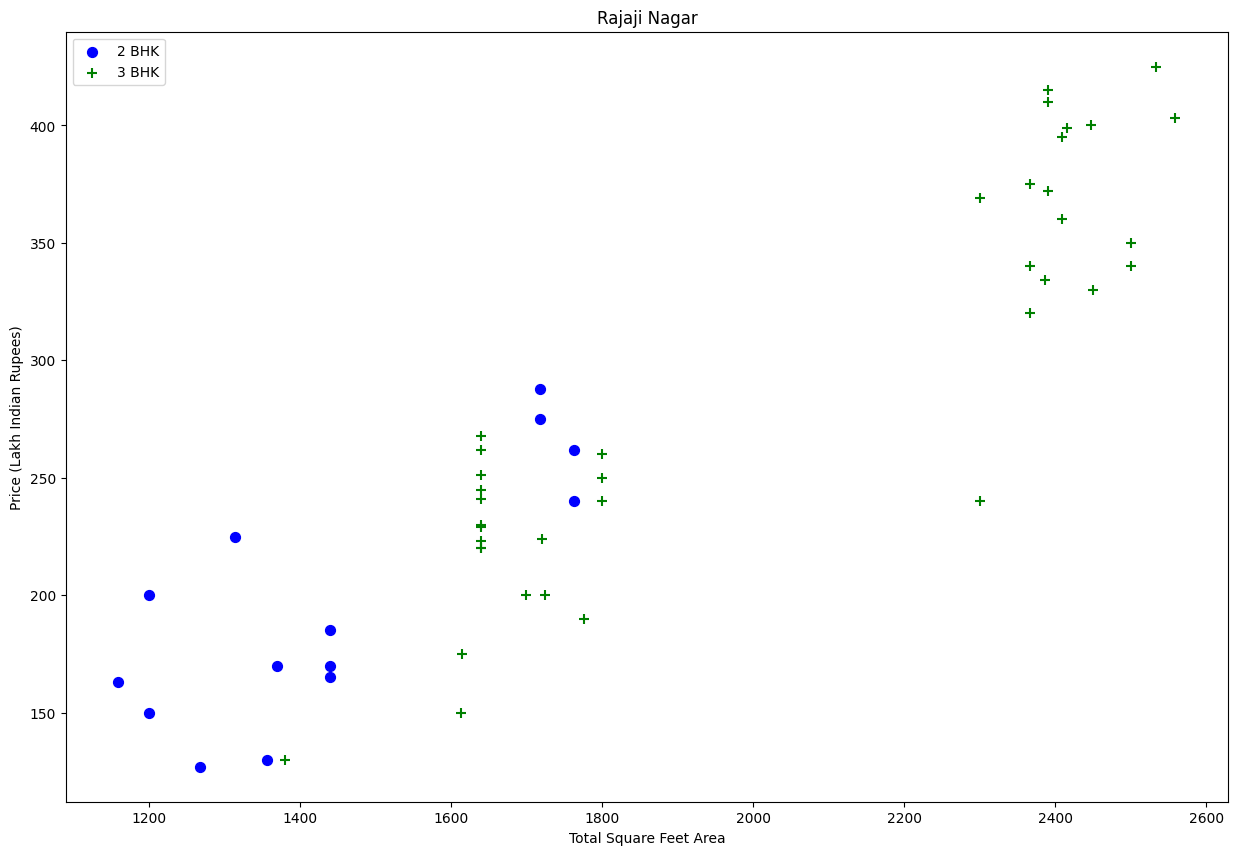

In [110]:
def plot_scatter_chart(df,location):
    bhk2 = df[(df.location==location) & (df.bedrooms==2)]
    bhk3 = df[(df.location==location) & (df.bedrooms==3)]
    plt.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label='2 BHK', s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,marker='+', color='green',label='3 BHK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Lakh Indian Rupees)")
    plt.title(location)
    plt.legend()
    
plot_scatter_chart(data_7,"Rajaji Nagar")

In [111]:
# Removing those 2 Bedroom apartments whose price_per_sqft is less than mean price_per_sqft of 1 Bedroom apartment

In [112]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bedrooms, bedrooms_df in location_df.groupby('bedrooms'):
            bhk_stats[bedrooms] = {
                'mean': np.mean(bedrooms_df.price_per_sqft),
                'std': np.std(bedrooms_df.price_per_sqft),
                'count': bedrooms_df.shape[0]
            }
        for bedrooms, bedrooms_df in location_df.groupby('bedrooms'):
            stats = bhk_stats.get(bedrooms - 1)
            if stats and stats['count'] > 5:
                exclude_indices = np.append(exclude_indices, bedrooms_df[bedrooms_df.price_per_sqft < (stats['mean'])].index.values)
    return df.drop(exclude_indices, axis='index')

df8 = remove_bhk_outliers(data_7)
df8.shape


(7329, 7)

Visualization

Text(0, 0.5, 'Count')

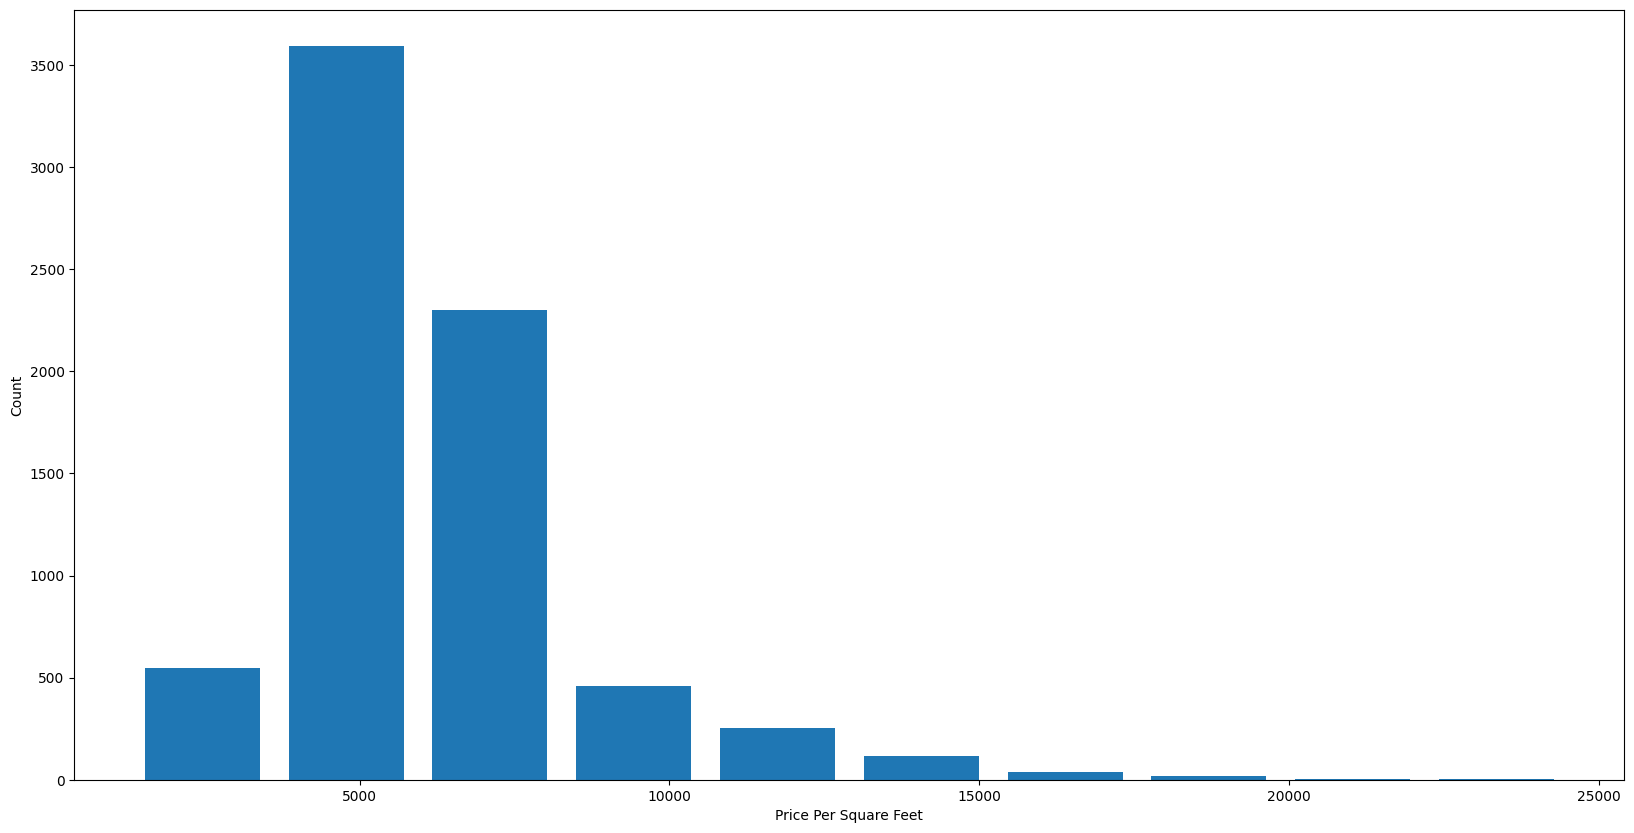

In [113]:
plt.rcParams["figure.figsize"] = (20,10)
plt.hist(df8.price_per_sqft,rwidth=0.8)
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")

Outlier Removal

In [114]:
df8.bath.unique()

array([ 4.,  3.,  2.,  5.,  8.,  1.,  6.,  7.,  9., 12., 16., 13.])

Text(0, 0.5, 'Count')

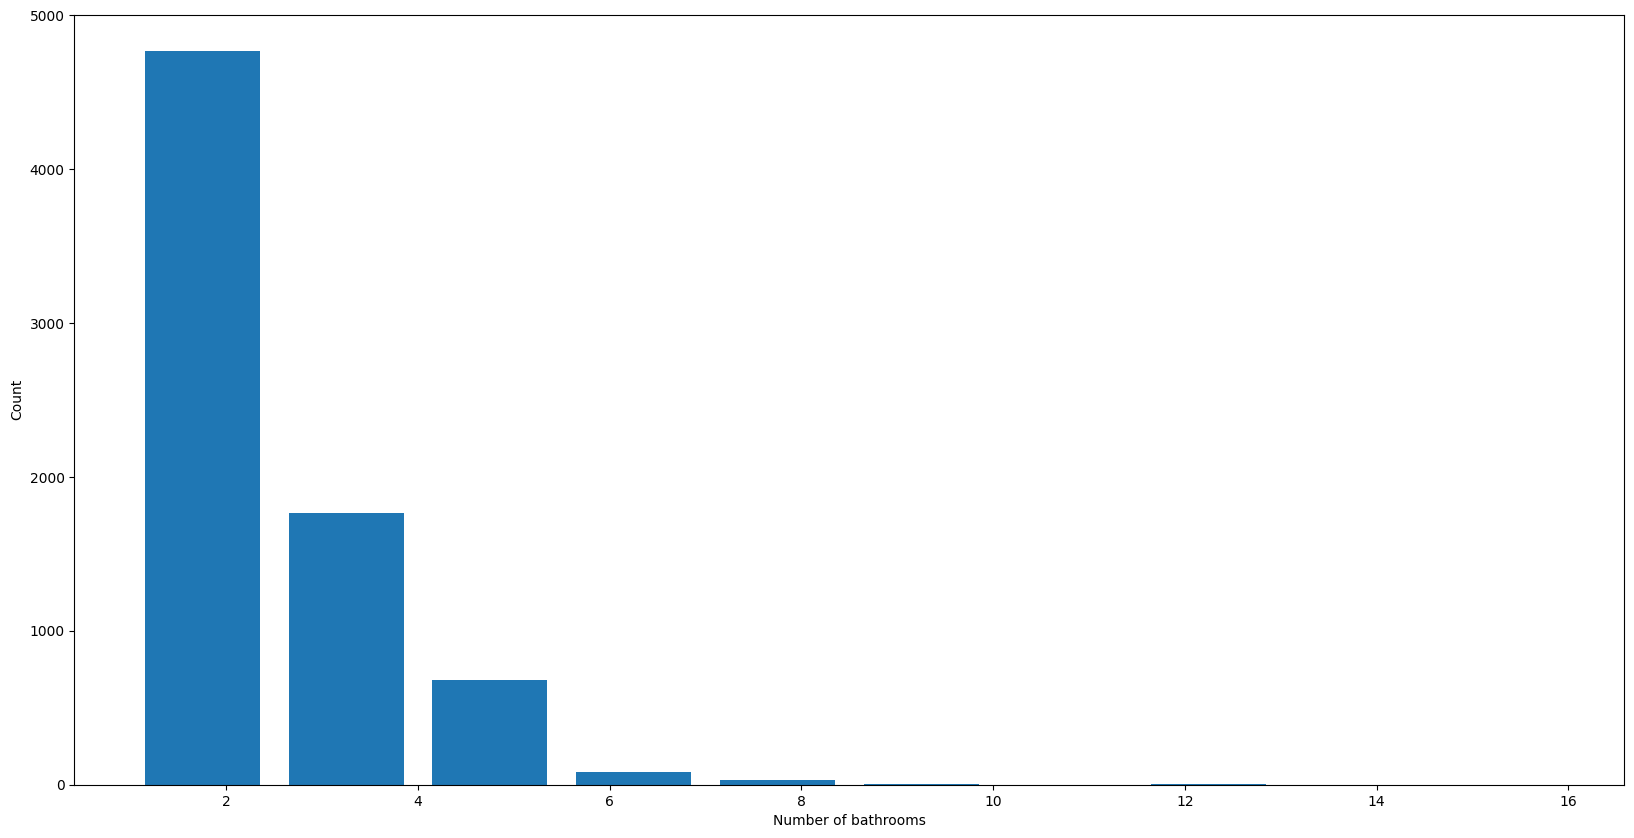

In [115]:
plt.hist(df8.bath,rwidth=0.8)
plt.xlabel("Number of bathrooms")
plt.ylabel("Count")

In [116]:
df8[df8.bath>10]

location    size  total_sqft  bath  price  bedrooms  \
5277  Neeladri Nagar  10 BHK      4000.0  12.0  160.0        10   
8486           other  10 BHK     12000.0  12.0  525.0        10   
8575           other  16 BHK     10000.0  16.0  550.0        16   
9308           other  11 BHK      6000.0  12.0  150.0        11   
9639           other  13 BHK      5425.0  13.0  275.0        13   

      price_per_sqft  
5277     4000.000000  
8486     4375.000000  
8575     5500.000000  
9308     2500.000000  
9639     5069.124424

In [117]:
df8[df8.bath>df8.bedrooms+2]

location       size  total_sqft  bath   price  bedrooms  \
1626  Chikkabanavar  4 Bedroom      2460.0   7.0    80.0         4   
5238     Nagasandra  4 Bedroom      7000.0   8.0   450.0         4   
6711    Thanisandra      3 BHK      1806.0   6.0   116.0         3   
8411          other      6 BHK     11338.0   9.0  1000.0         6   

      price_per_sqft  
1626     3252.032520  
5238     6428.571429  
6711     6423.034330  
8411     8819.897689

In [118]:
df9 = df8[df8.bath<df8.bedrooms+2]
df9.shape

(7251, 7)

In [119]:
df9.head(2)

location   size  total_sqft  bath  price  bedrooms  \
0  1st Block Jayanagar  4 BHK      2850.0   4.0  428.0         4   
1  1st Block Jayanagar  3 BHK      1630.0   3.0  194.0         3   

   price_per_sqft  
0    15017.543860  
1    11901.840491

In [120]:
df10 = df9.drop(['size','price_per_sqft'],axis='columns')
df10.head(3)

location  total_sqft  bath  price  bedrooms
0  1st Block Jayanagar      2850.0   4.0  428.0         4
1  1st Block Jayanagar      1630.0   3.0  194.0         3
2  1st Block Jayanagar      1875.0   2.0  235.0         3

One Hot Encoding For Location

In [121]:
dummies = pd.get_dummies(df10.location)
dummies.head(3)

1st Block Jayanagar  1st Phase JP Nagar  2nd Phase Judicial Layout  \
0                 True               False                      False   
1                 True               False                      False   
2                 True               False                      False   

   2nd Stage Nagarbhavi  5th Block Hbr Layout  5th Phase JP Nagar  \
0                 False                 False               False   
1                 False                 False               False   
2                 False                 False               False   

   6th Phase JP Nagar  7th Phase JP Nagar  8th Phase JP Nagar  \
0               False               False               False   
1               False               False               False   
2               False               False               False   

   9th Phase JP Nagar  ...  Vishveshwarya Layout  Vishwapriya Layout  \
0               False  ...                 False               False   
1               False  ...                 False               False   
2               False  ...                 False               False   

   Vittasandra  Whitefield  Yelachenahalli  Yelahanka  Yelahanka New Town  \
0        False       False           False      False               False   
1        False       False           False      False               False   
2        False       False           False      False               False   

   Yelenahalli  Yeshwanthpur  other  
0        False         False  False  
1        False         False  False  
2        False         False  False  

[3 rows x 242 columns]

In [122]:
df11 = pd.concat([df10,dummies.drop('other',axis='columns')],axis='columns')
df11.head()

location  total_sqft  bath  price  bedrooms  \
0  1st Block Jayanagar      2850.0   4.0  428.0         4   
1  1st Block Jayanagar      1630.0   3.0  194.0         3   
2  1st Block Jayanagar      1875.0   2.0  235.0         3   
3  1st Block Jayanagar      1200.0   2.0  130.0         3   
4  1st Block Jayanagar      1235.0   2.0  148.0         2   

   1st Block Jayanagar  1st Phase JP Nagar  2nd Phase Judicial Layout  \
0                 True               False                      False   
1                 True               False                      False   
2                 True               False                      False   
3                 True               False                      False   
4                 True               False                      False   

   2nd Stage Nagarbhavi  5th Block Hbr Layout  ...  Vijayanagar  \
0                 False                 False  ...        False   
1                 False                 False  ...        False   
2                 False                 False  ...        False   
3                 False                 False  ...        False   
4                 False                 False  ...        False   

   Vishveshwarya Layout  Vishwapriya Layout  Vittasandra  Whitefield  \
0                 False               False        False       False   
1                 False               False        False       False   
2                 False               False        False       False   
3                 False               False        False       False   
4                 False               False        False       False   

   Yelachenahalli  Yelahanka  Yelahanka New Town  Yelenahalli  Yeshwanthpur  
0           False      False               False        False         False  
1           False      False               False        False         False  
2           False      False               False        False         False  
3           False      False               False        False         False  
4           False      False               False        False         False  

[5 rows x 246 columns]

In [123]:
df12 = df11.drop('location',axis='columns')
df12.head(2)

total_sqft  bath  price  bedrooms  1st Block Jayanagar  1st Phase JP Nagar  \
0      2850.0   4.0  428.0         4                 True               False   
1      1630.0   3.0  194.0         3                 True               False   

   2nd Phase Judicial Layout  2nd Stage Nagarbhavi  5th Block Hbr Layout  \
0                      False                 False                 False   
1                      False                 False                 False   

   5th Phase JP Nagar  ...  Vijayanagar  Vishveshwarya Layout  \
0               False  ...        False                 False   
1               False  ...        False                 False   

   Vishwapriya Layout  Vittasandra  Whitefield  Yelachenahalli  Yelahanka  \
0               False        False       False           False      False   
1               False        False       False           False      False   

   Yelahanka New Town  Yelenahalli  Yeshwanthpur  
0               False        False         False  
1               False        False         False  

[2 rows x 245 columns]

In [124]:
#profile report of the features
ydata_profiling.ProfileReport(df12)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

### Model Construction

In [57]:
x = df12.drop('price', axis='columns')
x.head()

total_sqft  bath  bedrooms  1st Block Jayanagar  1st Phase JP Nagar  \
0      2850.0   4.0         4                 True               False   
1      1630.0   3.0         3                 True               False   
2      1875.0   2.0         3                 True               False   
3      1200.0   2.0         3                 True               False   
4      1235.0   2.0         2                 True               False   

   2nd Phase Judicial Layout  2nd Stage Nagarbhavi  5th Block Hbr Layout  \
0                      False                 False                 False   
1                      False                 False                 False   
2                      False                 False                 False   
3                      False                 False                 False   
4                      False                 False                 False   

   5th Phase JP Nagar  6th Phase JP Nagar  ...  Vijayanagar  \
0               False               False  ...        False   
1               False               False  ...        False   
2               False               False  ...        False   
3               False               False  ...        False   
4               False               False  ...        False   

   Vishveshwarya Layout  Vishwapriya Layout  Vittasandra  Whitefield  \
0                 False               False        False       False   
1                 False               False        False       False   
2                 False               False        False       False   
3                 False               False        False       False   
4                 False               False        False       False   

   Yelachenahalli  Yelahanka  Yelahanka New Town  Yelenahalli  Yeshwanthpur  
0           False      False               False        False         False  
1           False      False               False        False         False  
2           False      False               False        False         False  
3           False      False               False        False         False  
4           False      False               False        False         False  

[5 rows x 244 columns]

In [58]:
y = df12.price
y.head()

0    428.0
1    194.0
2    235.0
3    130.0
4    148.0
Name: price, dtype: float64

In [59]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=10)

In [60]:
# Linear Regression
from sklearn.linear_model import LinearRegression
LR = LinearRegression()
LR.fit(X_train, y_train)
LR.score(X_test, y_test)

0.8452277697874319

In [61]:
# Cross Validation
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

CV = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
cross_val_results = cross_val_score(LinearRegression(), x, y, cv=CV)

In [62]:
# Grid Search 
from sklearn.model_selection import GridSearchCV, ShuffleSplit
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_model(x, y):
    algos = {
        'Linear_Regression': {
            'model': LinearRegression(),
            'params': {
                'copy_X': [True, False],
                'fit_intercept': [True, False],
                'n_jobs': [None, 1, 2, 3], 
                'positive': [False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1, 2],
                'selection': ['random', 'cyclic']
            }
        },
        'Decision_Tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion': ['mse', 'friedman_mse'],
                'splitter': ['best', 'random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs = GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(x, y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores, columns=['model', 'best_score', 'best_params'])

find_best_model(x, y)


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
10 fits failed out of a total of 20.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/tree/_classes.py", line 1247, in fit
    super().fit(
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-package

model  best_score  \
0  Linear_Regression    0.819001   
1              lasso    0.687429   
2      Decision_Tree    0.711913   

                                         best_params  
0  {'copy_X': True, 'fit_intercept': False, 'n_jo...  
1                {'alpha': 1, 'selection': 'cyclic'}  
2  {'criterion': 'friedman_mse', 'splitter': 'best'}

Model Testing

In [63]:
def predict_price(location, sqft, bath, bedrooms):
    loc_index = np.where(x.columns == location)[0][0]

    input_data = np.zeros(len(x.columns))
    input_data[0] = sqft
    input_data[1] = bath
    input_data[2] = bedrooms
    if loc_index >= 0:
        input_data[loc_index] = 1

    return LR.predict([input_data])[0]


In [64]:
predict_price('1st Phase JP Nagar',1000, 2, 2)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


83.49904677176058

Model Exportation

In [65]:
# import pickle as pkl
# with open('model.pkl', 'wb') as f:
#     pkl.dump(LR, f)

In [66]:
# import json
# columns = {
#     'data_columns' : [col.lower() for col in x.columns]
# }
# with open("columns.json","w") as f:
#     f.write(json.dumps(columns))

In [67]:
# import joblib
# joblib.dump(LR, 'model.joblib')
# print("Model Saved Successfully with Joblib")

Model Saved Successfully with Joblib
